<a href="https://colab.research.google.com/github/ShrieyaDesai/ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Program 5 - Linear Regression -- Boston Dataset**

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           5.08e-88
Time:                        18:01:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

<ipython-input-51-f8f690b199d6>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = results.params[0] + results.params[1] * x_vals


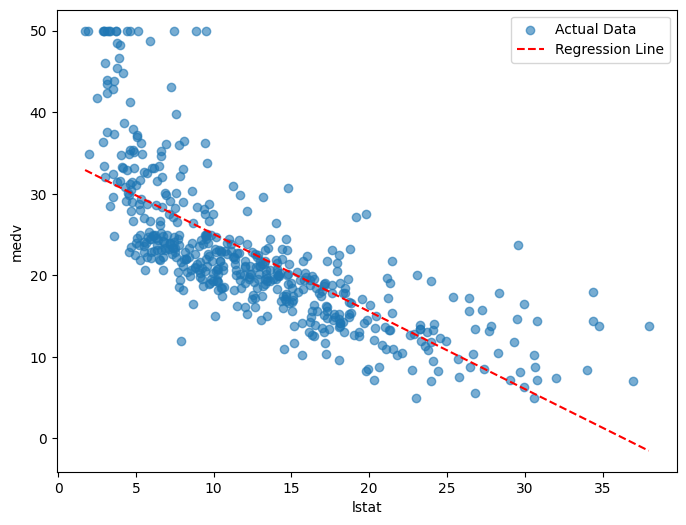

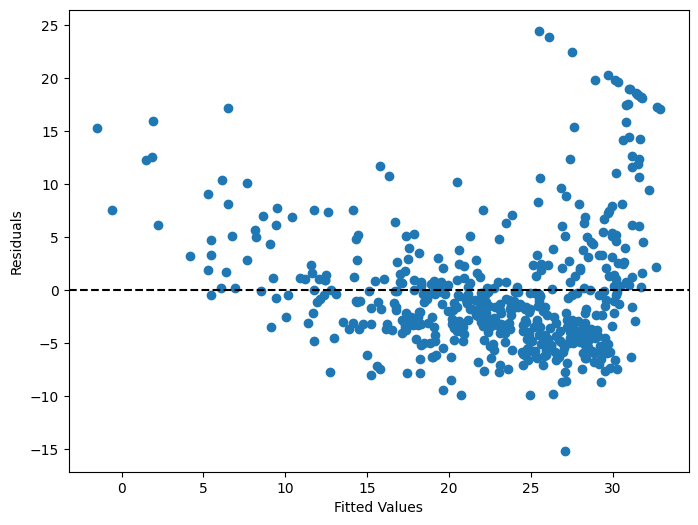

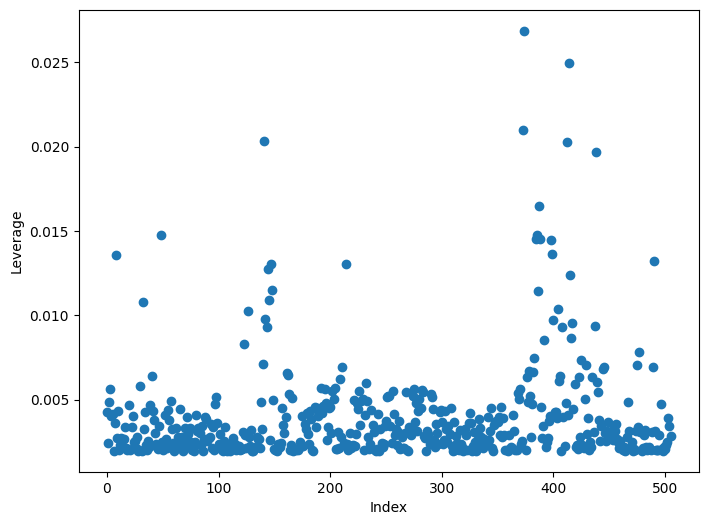

Predicted MEDV values: [29.80359411 25.05334734 20.30310057]
Confidence Interval:
 [[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]


In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#  Step 1: Load Boston dataset from a CSV file (No OpenML)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

#  Step 2: Prepare independent (X) and dependent (y) variables
X = df[['lstat']]  # Independent variable
X = sm.add_constant(X)  # Add intercept
y = df['medv']  # Target variable

#  Step 3: Fit an OLS Regression model
model = sm.OLS(y, X)
results = model.fit()

#  Step 4: Print summary of regression results
print(results.summary())
print(results.params)
print(summarize(results))
#  Step 5: Scatter Plot with Regression Line
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['lstat'], df['medv'], label="Actual Data", alpha=0.6)

# Regression Line
x_vals = np.linspace(df['lstat'].min(), df['lstat'].max(), 100)
y_vals = results.params[0] + results.params[1] * x_vals
ax.plot(x_vals, y_vals, 'r--', label="Regression Line")

ax.set_xlabel("lstat")
ax.set_ylabel("medv")
ax.legend()
plt.show()

#  Step 6: Residual Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.axhline(0, c='k', ls='--')
plt.show()

#  Step 7: Leverage Plot (Influence)
inf1 = results.get_influence()
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(np.arange(X.shape[0]), inf1.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
plt.show()

#  Step 8: Predictions for New Data
new_data = pd.DataFrame({'LSTAT': [5, 10, 15]})
new_data = sm.add_constant(new_data)  # Add intercept
new_predictions = results.get_prediction(new_data)

print("Predicted MEDV values:", new_predictions.predicted_mean)
print("Confidence Interval:\n", new_predictions.conf_int(alpha=0.05))


# **Program 5: Linear Regression -- Stock Market Dataset**

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [19]:
!pip install ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import matplotlib.pyplot as plt

  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)


In [23]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
  (LinearDiscriminantAnalysis as LDA,
   QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
from ISLP import load_data
Smarket = load_data('Smarket')
print(Smarket.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up


In [26]:
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [27]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [28]:
# Select only numeric columns
numeric_columns = Smarket.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

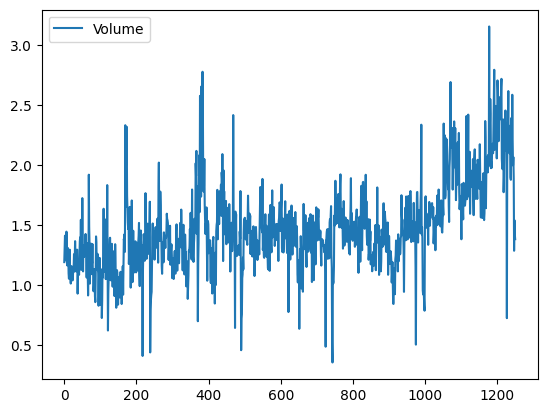

In [29]:
Smarket.plot(y='Volume');

In [30]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X=design.fit_transform(Smarket)
y=Smarket.Direction == 'Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
print(results.summary)
summarize(results)

<bound method GLMResults.summary of <statsmodels.genmod.generalized_linear_model.GLMResults object at 0x7ac2b6451e50>>


,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [31]:
results.params

,0
intercept,-0.126000
Lag1,-0.073074
Lag2,-0.042301
Lag3,0.011085
Lag4,0.009359
Lag5,0.010313
Volume,0.135441


In [32]:
results.pvalues

,0
intercept,0.600700
Lag1,0.145232
Lag2,0.398352
Lag3,0.824334
Lag4,0.851445
Lag5,0.834998
Volume,0.392404


In [33]:
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [34]:
labels = np.array(['Down']*1250)
labels[probs>0.5]='Up'

# Convert probabilities into class labels
labels = np.where(probs > 0.5, 1, 0)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Compute confusion matrix
conf_matrix = confusion_matrix(y, labels)
print("Confusion Matrix:\n", conf_matrix)

# Compute model accuracy
accuracy = np.mean(labels == y)
print("Accuracy:", accuracy)

# Create a training set for data before 2005
train = Smarket["Year"] < 2005

Confusion Matrix:
 [[145 457]
 [141 507]]
Accuracy: 0.5216


In [36]:

X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

998
252
998
252


In [37]:
D  = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [38]:
labels = np.array(['Down']*252)
labels[probs>0.5]='Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [39]:
np.mean(labels == L_test)
np.mean(labels !=L_test)

0.5198412698412699

In [40]:

import numpy as np
import statsmodels.api as sm

# Assuming the 'MS' model, and 'Smarket' data is already defined
model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]

# Fit the GLM model
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()

# Use results.predict() without passing 'params' explicitly
probs = results.predict(exog=X_test)

# Initialize 'labels' with 'Down' for all predictions
labels = np.array(['Down'] * len(X_test))  # Use len(X_test) to match the number of test samples

# Assign 'Up' to the labels where the predicted probability is greater than 0.5
labels[probs > 0.5] = 'Up'

# Compute confusion table (assuming 'L_test' is your true labels for the test set)
confusion_table(labels, L_test)  # This assumes confusion_table function is already defined



Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [41]:
newdata = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2':[1.1, -0.8]});
newX=model.transform(newdata)
results.predict(newX)

,0
0,0.479146
1,0.496094


In [42]:
lda = LDA(store_covariance=True)
X_train,X_test= [M.drop(columns=['intercept'])for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [43]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [44]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [45]:
lda.priors_

array([0.49198397, 0.50801603])

In [46]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [47]:
lda_pred = lda.predict(X_test)

In [48]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [49]:
# Get predicted probabilities from LDA
lda_prob = lda.predict_proba(X_test)

# Compare the predicted probability for class '1' to determine 'Up' or 'Down'
pred_labels = np.where(lda_prob[:, 1] >= 0.5, 'Up', 'Down')

# Now, compare the predicted labels with the true labels (assumed to be in 'y_test')
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_labels)
print("Accuracy:", accuracy)
print("Smarket Dataset Size:", Smarket.shape)

Accuracy: 0.0
Smarket Dataset Size: (1250, 9)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:239: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [50]:
np.all([lda.classes_[i] for i in np.argmax(lda_prob,1)] == lda_pred)

True